In [1]:
library(tidyverse)
library(lmtest)
library(car)
library(ggrepel)
library(dplyr)
library(fivethirtyeight)
library(ggplot2)
library(moments)

── Attaching packages ─────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: zoo


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


Loading required package: carData


Attaching package: 'car'


The following object is masked from 'package:dplyr':

    recode


The following object is masked from 'package:purrr':

    some


Some larger datasets need to be installed separately, like senators and
house_district_forecast. To install these, we recommend you install the
fivethirtyeightdata package by running:
insta

# 1 Introducción
La correlación lineal y la regresión lineal simple son métodos estadísticos que estudian la relación lineal existente entre dos variables

Por norma general, los estudios de correlación lineal preceden a la generación de modelos de regresión lineal. Primero se analiza si ambas variables están correlacionadas y, en caso de estarlo, se procede a generar el modelo de regresión.

Se puede utilizar para inferencia estadística clásica, diseño de experimentos y machine learning.

## 1.1 Correlación Lineal
1. Correlación de Pearson: funciona bien con variables cuantitativas que tienen una distribución normal. Es más sensible a los valores extremos que las otras dos alternativas

2. Correlación de Spearman: se emplea cuando los datos son ordinales, de intervalo, o bien cuando no se satisface la condición de normalidad para variables continuas y los datos se pueden transformar a rangos. Es un método no paramétrico.

3. Correlación de Kendall: es otra alternativa no paramétrica para el estudio de la correlación que trabaja con rangos. Se emplea cuando se dispone de pocos datos y muchos de ellos ocupan la misma posición en el rango, es decir, cuando hay muchas ligaduras.

Se puede usar ```cor()``` y ```cor.test()```

1. Probar normalidad

    - histogramas, qqplot, qqline
    - prueba formal
2. Homocedasticidad

    - histogramas para ver dispersión de datos
3. Calculo de correlación

    - ```cor()```
4. Significancia de la correlación

    - ```cor.test()```
    
## 1.2 Regresión Lineal
Según menciona Fernando Tuseel, son frecuentes en la práctica situaciones en las que se cuenta con observaciones de diversas variables, y es razonable pensar en una relación entre ellas.

El poder determinar si existe esta relación y, en su caso, una forma funcional para la misma es de sumo interés. Por una parte, ello permitiría, conocidos los valores de algunas variables, efectuar predicciones sobre los valores previsibles de otra. Podríamos también responder con criterio estadístico a cuestiones acerca de la relación de una variable sobre otra.

Por medio de la regresión lineal se intenta modelar la relación entre una variable dependiente (explicada o variable de interés) y una o más variables independientes (explicativa o de predicción).

¿Es posible modelar la variable Y en función de la variable X?

$$y=f(x)=a+bx+\varepsilon$$

El objetivo de la regresión lineal es determinar si la relación lineal existe y encontrar los coeficientes $a$, $b$ y $\varepsilon$ (errores de predicción).

Esto sería encontrar la función que mejor explique la relación entre la variable dependiente y las independientes.

# 2 Supuestos para la regresión lineal
_Para verificar algunos de los supuestos es suficiente hacerlo mediante métodos gráficos._

Para realizar una regresión lineal se deben considerar los siguientes supuestos:

1. **Relación lineal entre los predictores y la variable respuesta:** para elaborar este modelo es importante que las variables predictoras se relacionen linealmente con la variable respuesta, ya que de no ser así el modelo no sería apropiado para los datos. Verificar con un gráfico de dispersión, calcular residuos y graficarlos mostrando una distribución aleatoria alrededor de 0.

2. **Normalidad:** si los errores no se distribuyen normalmente es posible que los estimadores de mínimos cuadrados no sean óptimos. Además las pruebas de intervalos de confianza no son válidos (en casos de datos muy alejados de distribución normal).

3. **Varianza de residuos constantes (Homoscedasticidad):** como se menciona anteriormente este supuesto se puede verficar gráficamente, sin embargo si se tienen pocas observaciones se pueden gráficar los valores absolutos o la raíz cuadrada. Además para la regresión se usa la prueba formal de Bresuch-Pagan.

4. **Valores atípicos y de alta influencia:** estudiar los valores que puedan generar una falsa correlación que realmente no existe, u ocultar una existente. Analizar los valores extremos en los datos que puedan estar afectando las estimaciones.

5. **No autocorrelación (independencia):** las observaciones deben ser independientes unas de otras, es frecuente en datos relacionados en el tiempo o espacio, es recomendable gráficar los errores en orden cronológico o alguna prueba formal como la prueba Durbin-Watson si no es claro gráficamente.

Modelos Lineales Múltiples (deben cumplir los mismos supuestos y algunos adicionales)

- No colinealidad o multicolinealidad
- Parsimonia
- Tamaño de la muestra

In [2]:
#Cargar los datos 
trafico <- read.csv("Data/trafico.csv")

modelo1 <- lm(AADT ~ ., trafico)

#graficación de los residuales para verificar normalidad
residuales <- modelo1$residuals
prediccion <- modelo1$fitted.values

## 2.1 Linealidad
- Realizar un gráfico de dispersión suponiendo la relación lineal
- Calcular los residuos de cada observación de acuerdo al modelo y hacer un gráfico de dispersión. Los datos deben distribuirse de forma aleatorio sobre el valor 0.

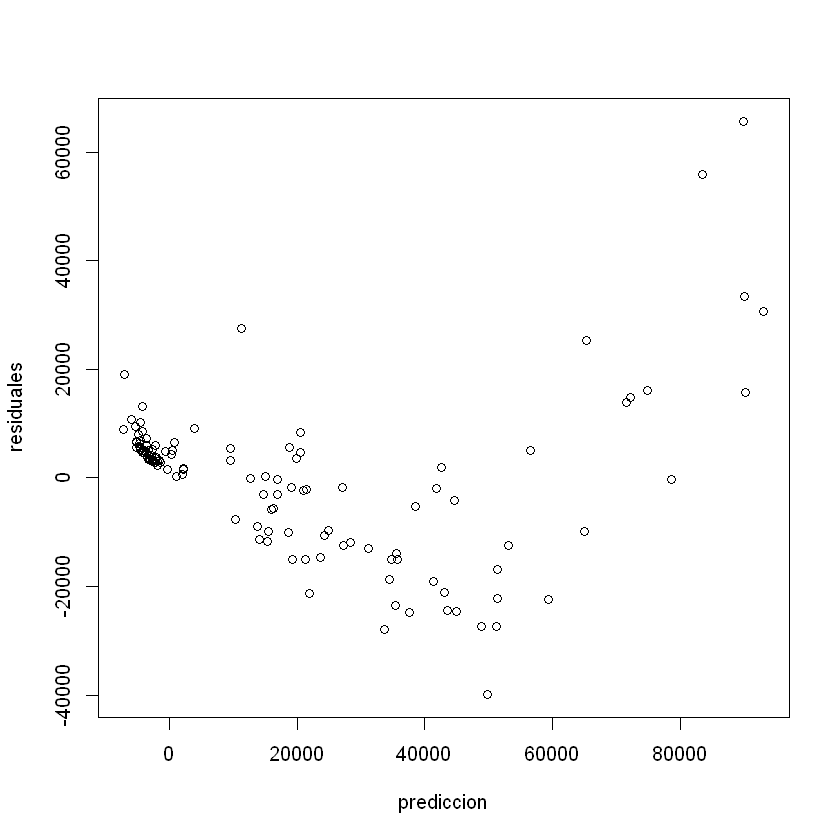

In [3]:
#gráfico de dispersión de los residuos

plot(prediccion, residuales)

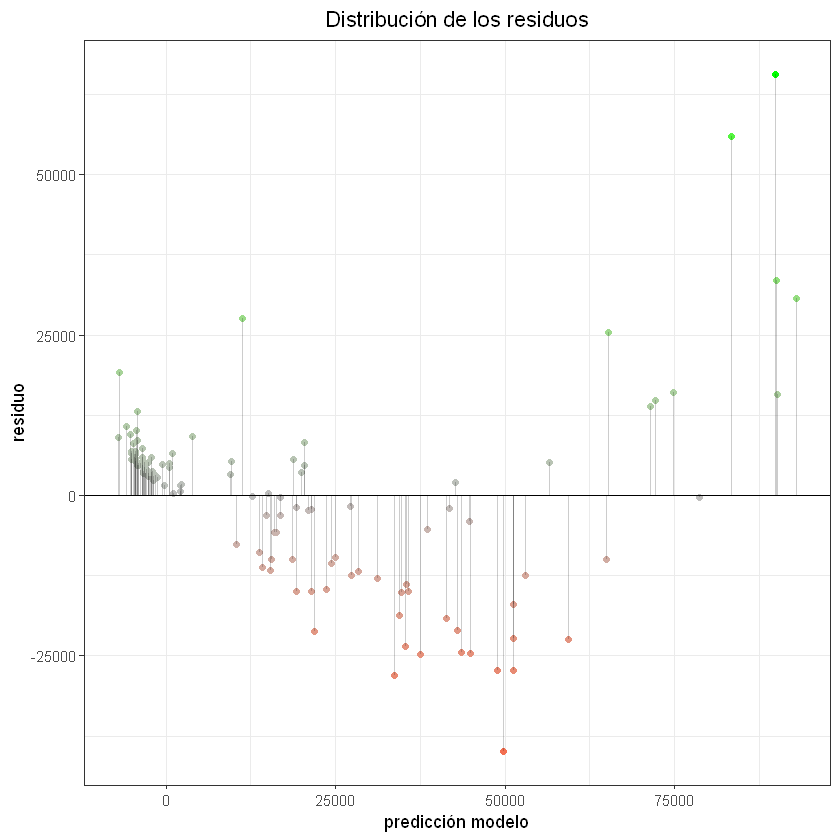

In [4]:
datos <- data.frame(prediccion = prediccion, residuos = residuales)
ggplot(data = datos, aes(x = prediccion, y = residuos)) + geom_point(aes(color = residuos)) +
  scale_color_gradient2(low = "red", mid = "grey", high = "green") + geom_hline(yintercept = 0) +
  geom_segment(aes(xend = prediccion, yend = 0), alpha = 0.2) + 
  labs(title = "Distribución de los residuos", x = "predicción modelo",
  y = "residuo") +
  theme_bw() +
  theme(plot.title = element_text(hjust = 0.5), legend.position = "none")

Cuando los residuos se distribuyen de forma aleatoria entorno al cero (0) se puede decir que se acepta la linealidad las variables en estudio.

## 2.2 Normalidad de residuos

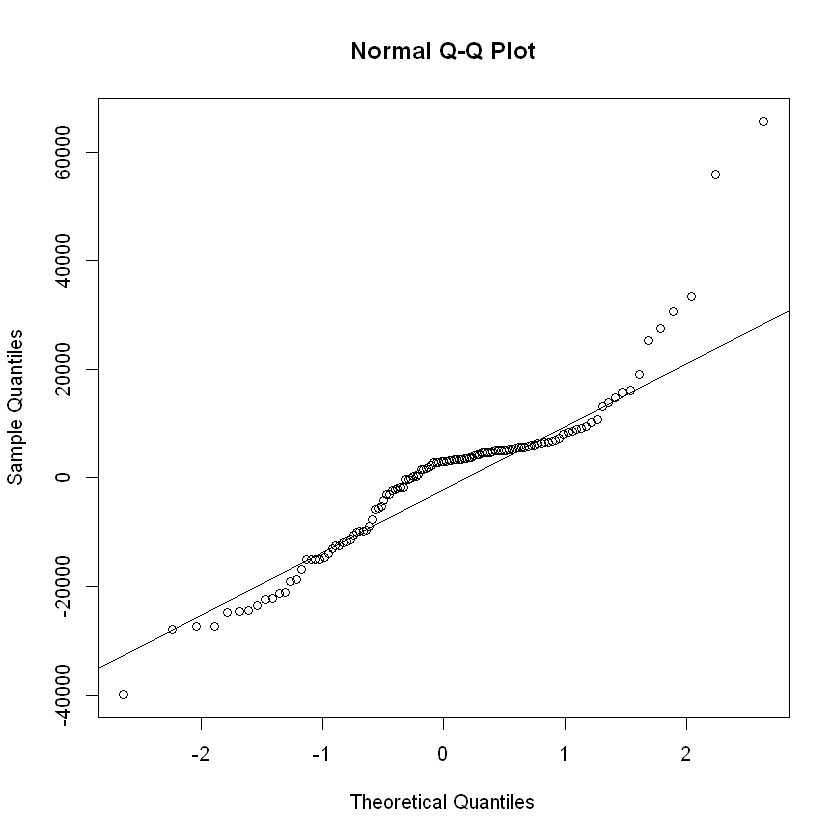

In [5]:
#Verificar normalidad de residuos

qqnorm(residuales)
qqline(residuales)

In [6]:
#En las colas se ve que están alejados datos de la línea identidad
shapiro.test(residuales)


	Shapiro-Wilk normality test

data:  residuales
W = 0.90169, p-value = 2.182e-07


En el gráfico observamos que los valores en las colas se alejan mucho de la distribución teórica, esto apunta que no se cumple el supuesto de normalidad de los residuales. Esto se confirma al ejecutar la prueba formal de Shapiro-Wilk.

Sin embargo, podemos probar aplicar una medida remedial o transformación lineal a los datos y volver a verificar si esto corrige el incumplimiento del supuesto.

**¿Por qué usamos esta medida?**

Bueno, en los residuales se observa que los residuales se alejan en las colas lo que es señal de que hay valores que se alejan mucho de la media y esto puede estar afectando este supuesto. La transformación “suaviza” el efecto de esa variabilidad en las colas de la distribución.

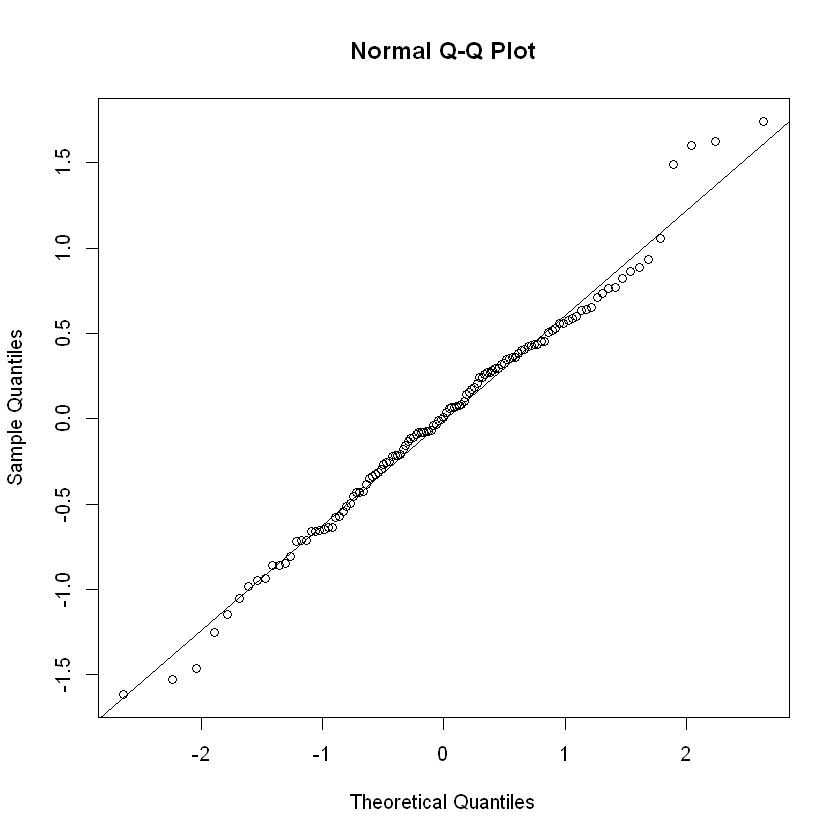

In [7]:
#Transformación para "curar" normalidad
modelo1 <- lm(log(AADT) ~ ., trafico)
residuales <- modelo1$res

datos <- data.frame(prediccion = prediccion, residuos = residuales)

qqnorm(residuales)
qqline(residuales)

In [8]:
#En las colas se ve que están alejados datos de la línea identidad

shapiro.test(residuales)


	Shapiro-Wilk normality test

data:  residuales
W = 0.98849, p-value = 0.4031


En este qqplot vemos que ya no se alejan tanto de los cuantiles teóricos, con excepción de algunos casos. Sólo con el gráfico es dificil determinar si se cumple o no el supuesto, por lo que se considera la prueba formal.

## 2.3 Homocedasticidad

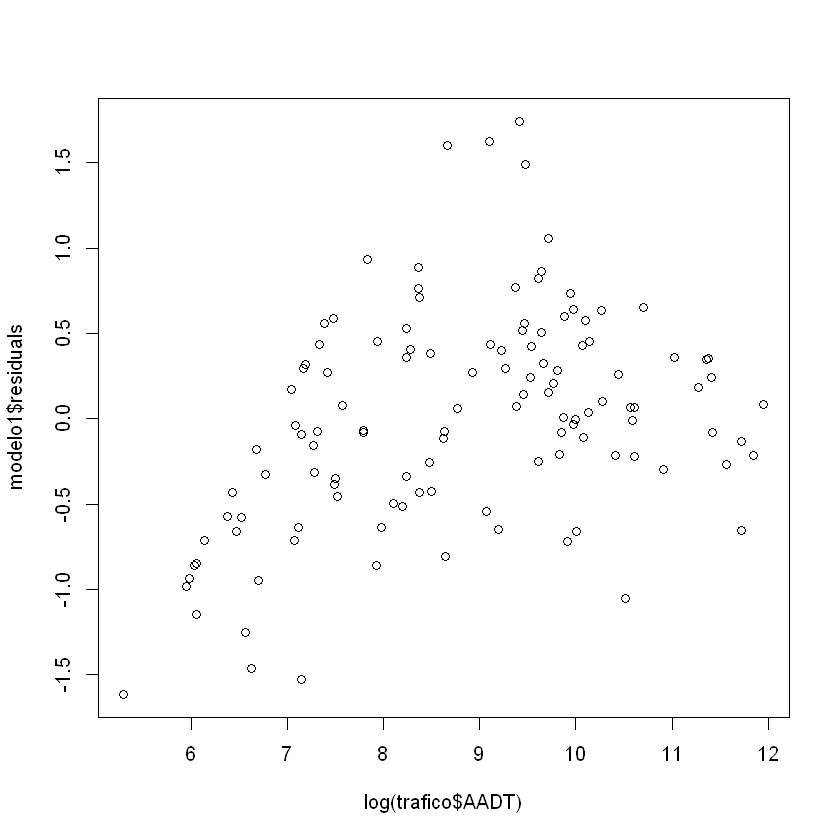

In [9]:
#Homoscedasticidad
plot(log(trafico$AADT), modelo1$residuals)

In [10]:
bptest(modelo1,stud=F)


	Breusch-Pagan test

data:  modelo1
BP = 17.723, df = 8, p-value = 0.0234


En este gráfico observamos un leve patrón en la distribución de los residuales, se debe confirmar con la prueba formal si el supuesto se cumple.

## 2.4 Valores atípicos y de alta influencia
En R se dispone de la función ```outlierTest()``` del paquete ```car``` y de las funciones ```influence.measures()```, ```influencePlot()``` y ```hatvalues()``` para identificar las observaciones más influyentes en el modelo.

In [11]:
modelo_city <- lm(log(AADT) ~ CTYPOP, trafico)
summary(modelo_city)


Call:
lm(formula = log(AADT) ~ CTYPOP, data = trafico)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.1432 -0.9765  0.0604  1.1117  2.3436 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 8.055e+00  1.492e-01  54.006  < 2e-16 ***
CTYPOP      2.885e-06  3.545e-07   8.139 4.42e-13 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.279 on 119 degrees of freedom
Multiple R-squared:  0.3576,	Adjusted R-squared:  0.3522 
F-statistic: 66.24 on 1 and 119 DF,  p-value: 4.42e-13


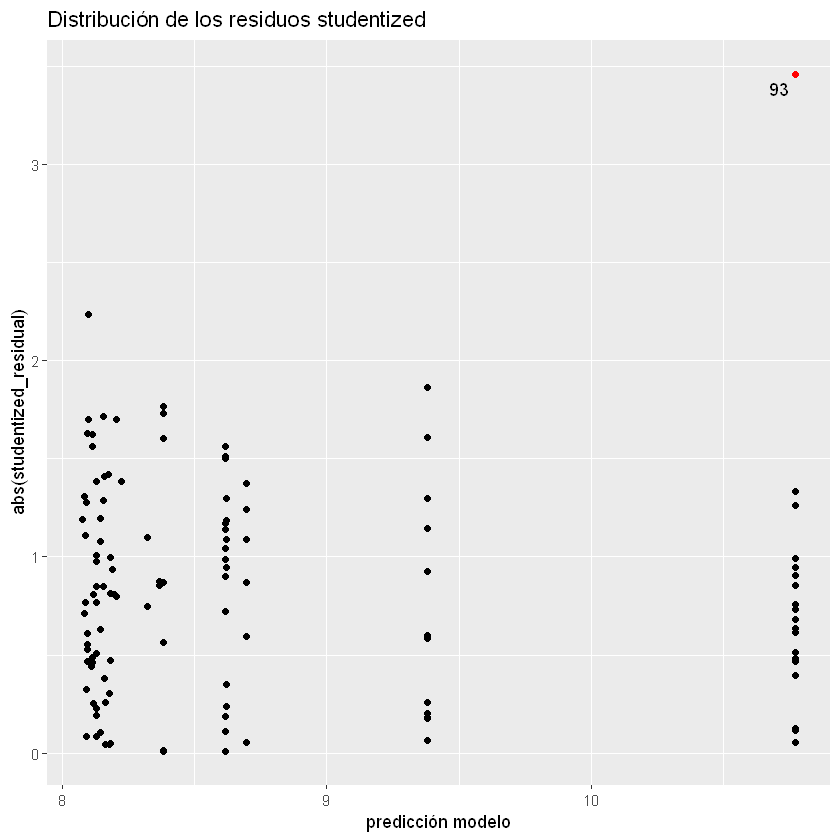

In [12]:
trafico$studentized_residual <- rstudent(modelo_city)
trafico$prediccion <- modelo_city$fitted.values
trafico$residuos <- modelo_city$residuals

ggplot(data = trafico, aes(x = prediccion, y = abs(studentized_residual))) +
geom_point(aes(color = ifelse(abs(studentized_residual) > 3, 'red', 'black'))) +
geom_text_repel(data = filter(trafico, abs(studentized_residual) > 3), aes(label = X)) +
labs(title = "Distribución de los residuos studentized", x = "predicción modelo") + scale_color_identity()

In [13]:
outlierTest(model = modelo_city)

No Studentized residuals with Bonferroni p < 0.05
Largest |rstudent|:
    rstudent unadjusted p-value Bonferroni p
93 -3.460672         0.00075088     0.090857

In [14]:
summary(influence.measures(model = modelo_city))

Potentially influential observations of
	 lm(formula = log(AADT) ~ CTYPOP, data = trafico) :

    dfb.1_ dfb.CTYP dffit   cov.r   cook.d hat  
18  -0.26   0.16    -0.26    0.95_*  0.03   0.01
59  -0.03   0.12     0.14    1.06_*  0.01   0.04
62  -0.04   0.15     0.16    1.05_*  0.01   0.04
63  -0.02   0.08     0.08    1.06_*  0.00   0.04
66  -0.02   0.10     0.11    1.06_*  0.01   0.04
67  -0.02   0.09     0.10    1.06_*  0.01   0.04
69  -0.02   0.09     0.10    1.06_*  0.00   0.04
72  -0.01   0.02     0.02    1.06_*  0.00   0.04
80   0.01  -0.02    -0.03    1.06_*  0.00   0.04
82   0.03  -0.13    -0.15    1.05_*  0.01   0.04
85   0.04  -0.14    -0.16    1.05_*  0.01   0.04
93   0.17  -0.66    -0.74_*  0.88_*  0.25   0.04
95   0.03  -0.12    -0.13    1.06_*  0.01   0.04
102  0.00  -0.01    -0.01    1.06_*  0.00   0.04
118  0.03  -0.12    -0.14    1.06_*  0.01   0.04


StudRes    Hat        CookD      
18 -2.2352565 0.01301104 0.031862442
59  0.6365803 0.04355231 0.009272618
62  0.7597679 0.04355231 0.013189472
75 -1.3338286 0.04355231 0.040242590
93 -3.4606724 0.04355231 0.249645580

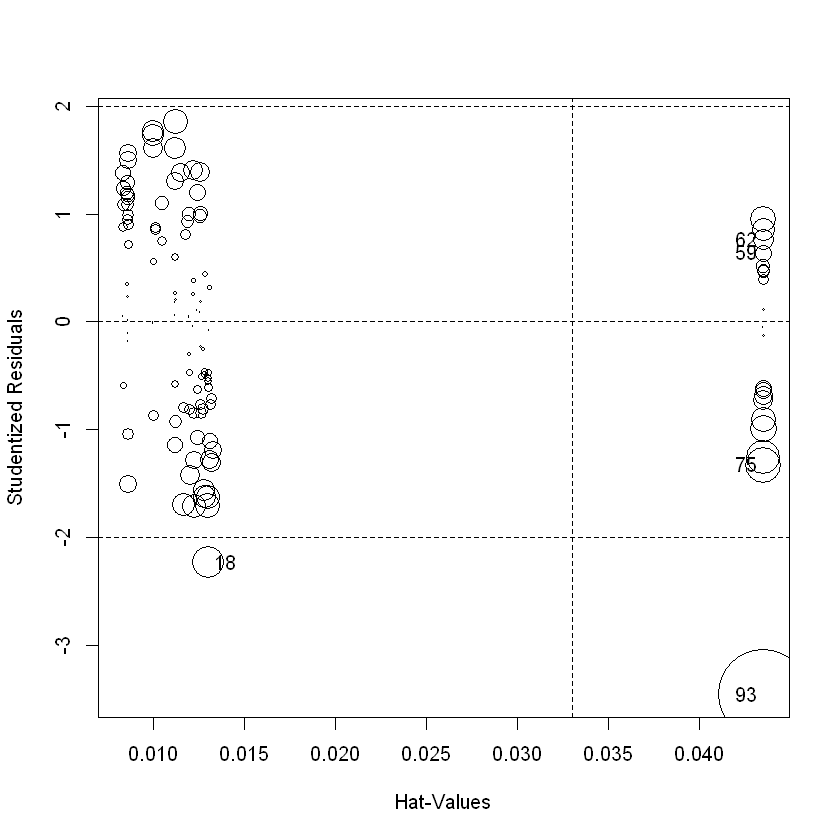

In [15]:
influencePlot(model = modelo_city)

In [16]:
hatvalues(model = modelo_city)

1           2           3           4           5           6 
0.013063448 0.011685989 0.012412380 0.012621046 0.012791405 0.013136546 
          7           8           9          10          11          12 
0.013219204 0.012628950 0.012412380 0.012628950 0.013219204 0.012621777 
         13          14          15          16          17          18 
0.010115195 0.012602412 0.013036843 0.012818401 0.012275692 0.013011038 
         19          20          21          22          23          24 
0.012037931 0.013007946 0.012223744 0.008394766 0.008394766 0.008394766 
         25          26          27          28          29          30 
0.008394766 0.008394766 0.011992218 0.011783494 0.010115195 0.012621046 
         31          32          33          34          35          36 
0.012621777 0.010520356 0.012602412 0.011885170 0.013103570 0.012798603 
         37          38          39          40          41          42 
0.013129471 0.011482720 0.012872447 0.012275692 0.012435753 0.012275692 
         43          44          45          46          47          48 
0.012412380 0.008394766 0.010520356 0.013077316 0.012774419 0.013284284 
         49          50          51          52          53          54 
0.013082045 0.011992218 0.013036843 0.013036843 0.013063448 0.012774419 
         55          56          57          58          59          60 
0.012791405 0.011685989 0.012223744 0.011224362 0.043552309 0.011224362 
         61          62          63          64          65          66 
0.008631538 0.043552309 0.043552309 0.043552309 0.043552309 0.043552309 
         67          68          69          70          71          72 
0.043552309 0.011224362 0.043552309 0.008613514 0.008631538 0.043552309 
         73          74          75          76          77          78 
0.009988471 0.008631538 0.043552309 0.008613514 0.011968066 0.009988471 
         79          80          81          82          83          84 
0.008631538 0.043552309 0.011224362 0.043552309 0.008613514 0.008613514 
         85          86          87          88          89          90 
0.043552309 0.008631538 0.012198782 0.008631538 0.009988471 0.009988471 
         91          92          93          94          95          96 
0.009988471 0.012602412 0.043552309 0.011224362 0.043552309 0.043552309 
         97          98          99         100         101         102 
0.043552309 0.011224362 0.008631538 0.011968066 0.011224362 0.043552309 
        103         104         105         106         107         108 
0.008631538 0.008613514 0.008631538 0.008631538 0.011968066 0.009988471 
        109         110         111         112         113         114 
0.009988471 0.011224362 0.011224362 0.011224362 0.008613514 0.012198782 
        115         116         117         118         119         120 
0.008631538 0.008631538 0.043552309 0.043552309 0.011224362 0.011224362 
        121 
0.011968066

## 2.5 No autocorrelación
Cuando los residuos no muestran ninguna tendencia se puede decir que son independientes.

Obversar si las observaciones consecutivas tienden a estar cerca unas de otras, indica que el supuesto de independencia va a fallar.

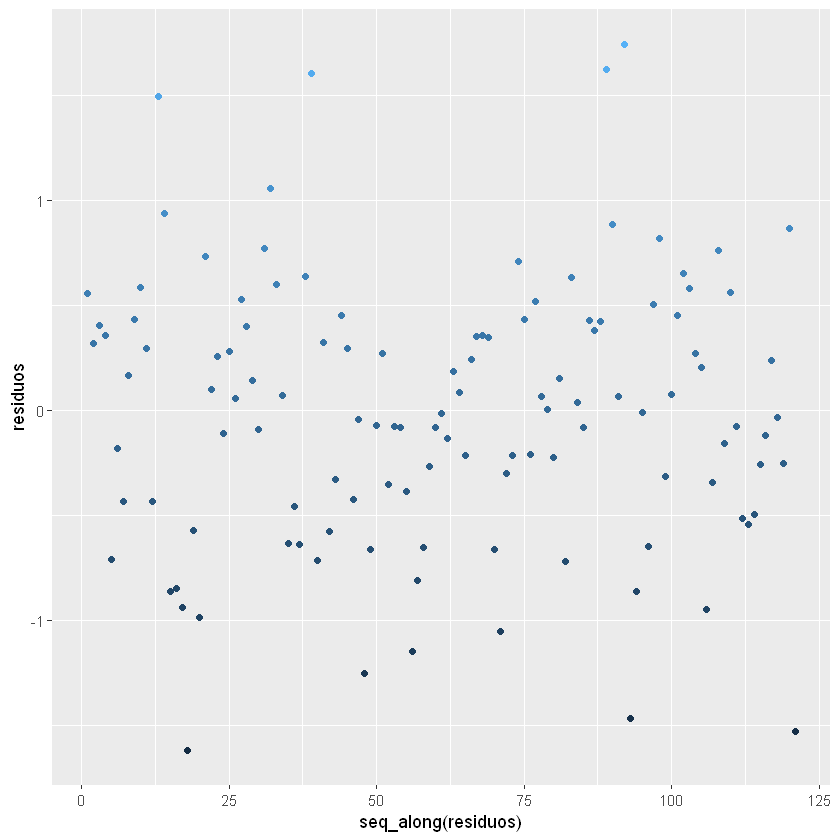

In [17]:
ggplot(data = datos, aes(x = seq_along(residuos), y = residuos)) + 
  geom_point(aes(color = residuos)) +
  theme(legend.position = "none")


In [18]:
dwtest(modelo1)


	Durbin-Watson test

data:  modelo1
DW = 1.5197, p-value = 0.001324
alternative hypothesis: true autocorrelation is greater than 0


# 3 Coeficientes del modelo

In [19]:
m <- lm(log(AADT) ~ CTYPOP, data = trafico)   # Cálculo de la regresión lineal
summary(m)


Call:
lm(formula = log(AADT) ~ CTYPOP, data = trafico)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.1432 -0.9765  0.0604  1.1117  2.3436 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 8.055e+00  1.492e-01  54.006  < 2e-16 ***
CTYPOP      2.885e-06  3.545e-07   8.139 4.42e-13 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.279 on 119 degrees of freedom
Multiple R-squared:  0.3576,	Adjusted R-squared:  0.3522 
F-statistic: 66.24 on 1 and 119 DF,  p-value: 4.42e-13


In [20]:
c <- coefficients(m)                     # Obtención de coeficientes a y b
c

(Intercept)       CTYPOP 
8.055238e+00 2.885017e-06

In [21]:
# plot( d$CTYPOP,  d$AADT)
# abline(m)

La ecuación es: $Y_{AADT}=4436.592+0.056\cdot CTYPOP+\varepsilon$

Al igual que con las otras pruebas, la regresión lineal tiene un p-value que determina la confianza del ajuste. Adicionalmente provee información de los errores en el cálculo de coeficientes:

**IMPORTANTE** El p-value obtenido el test F determina si la varianza explicada es signigicativamennte superior a la varianza total. Siendo este el parámetro que determina si el modelo es significativo y por lo tanto se puede aceptar.

`geom_smooth()` using formula 'y ~ x'



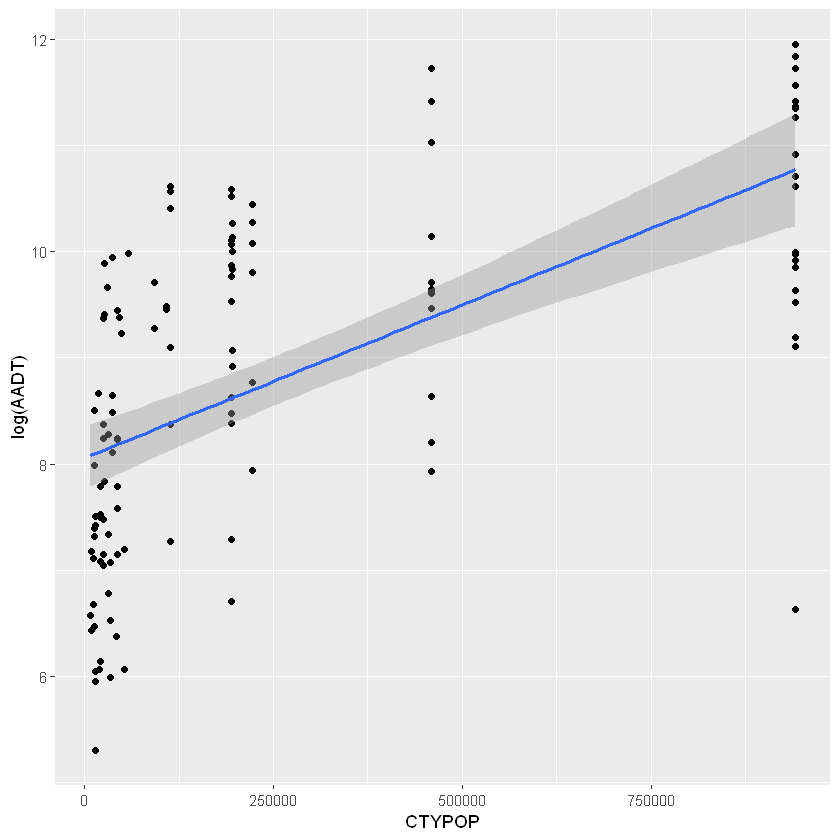

In [22]:
ggplot(trafico, aes(x= CTYPOP, y = log(AADT))) + geom_point() +
  geom_smooth(method = lm) 

# 4 Interpretación de los datos
Pendiente e intersección de la ecuación encontrada con la regresión lineal

Para verificar la relación entre variables, podemos entonces ayudarnos con un diagrama de dispersión, una diagrama de cajas y bigotes, un diagrama de densidad. y Correlación de Pearson.

**Coeficiente de determinación** $R^2$. Se interpreta como la cantidad de varianza de Y explicada por X. Así se usa $R^2$ no ajustado y $R^2$ ajustado para determinar la fuerza de un ajuste.

En este caso el $R^2$ representa: Las variable predictora del modelo explica un $38.5\%$ de la variabilidad total de la variable respuesta.

O también se puede ver como : El tanto $\%$ (porcentaje) de la variación en la variable de respuesta puede ser atribuido a la variable predictora.

Un nuevo ejemplo con el conjunto datos mtcars:

`geom_smooth()` using formula 'y ~ x'



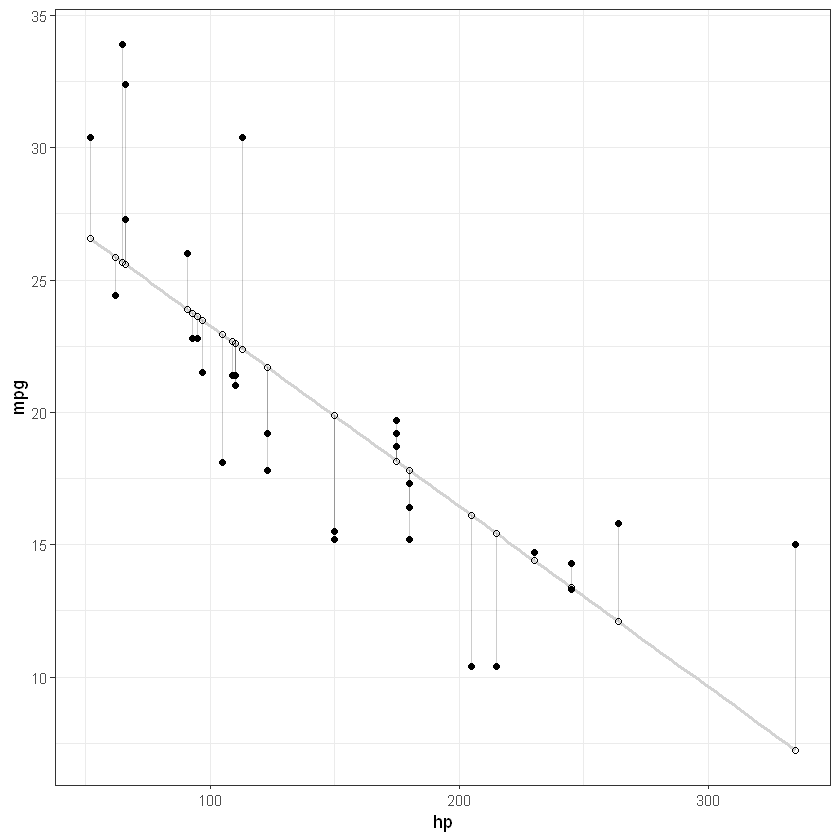

In [23]:
d <- mtcars
fit <- lm(mpg ~ hp, data = d)
d$predicted <- predict(fit)
d$residuals <- residuals(fit)

ggplot(d, aes(x = hp, y = mpg)) +
  geom_smooth(method = "lm", se = FALSE, color = "lightgrey") +  # graficar la linea de ajuste
  geom_segment(aes(xend = hp, yend = predicted), alpha = .2) +  # agregar alfa a los puntos de la linea
  geom_point() +
  geom_point(aes(y = predicted), shape = 1) +
  theme_bw()

`geom_smooth()` using formula 'y ~ x'



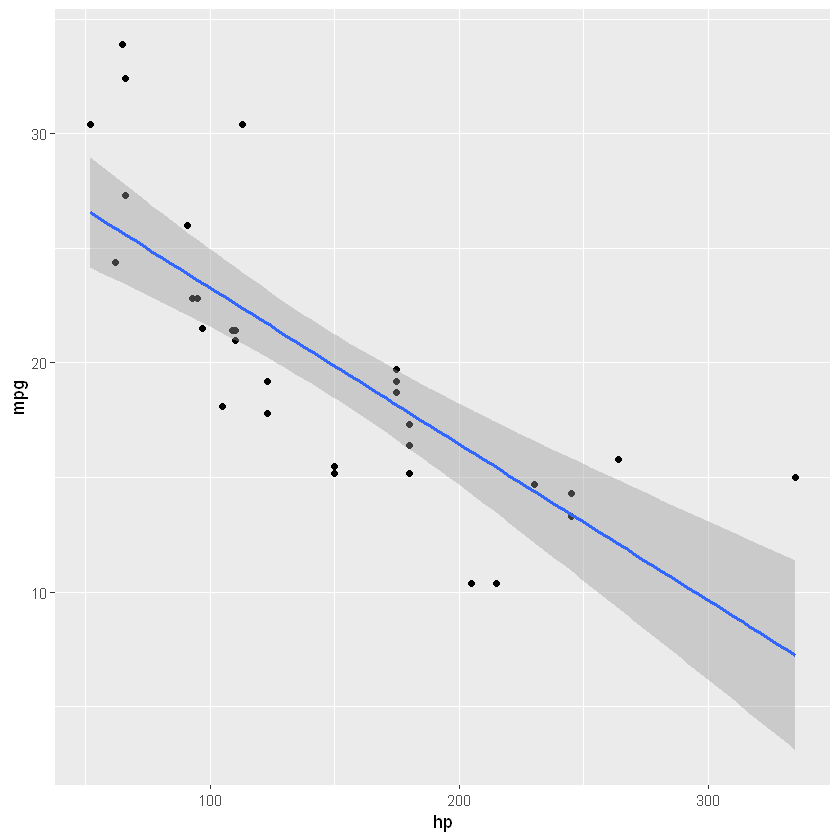

In [24]:
ggplot(d, aes(x= hp, y = mpg)) + geom_point() +
  geom_smooth(method = lm) 

In [25]:
summary(fit) #Interpretar los coeficientes


Call:
lm(formula = mpg ~ hp, data = d)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.7121 -2.1122 -0.8854  1.5819  8.2360 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 30.09886    1.63392  18.421  < 2e-16 ***
hp          -0.06823    0.01012  -6.742 1.79e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.863 on 30 degrees of freedom
Multiple R-squared:  0.6024,	Adjusted R-squared:  0.5892 
F-statistic: 45.46 on 1 and 30 DF,  p-value: 1.788e-07


# 5 Estimación de intervalos de confianza con el modelo
¿Cuál es el intervalo de confianza del valor promedio de la variable de respuesta Y para un deteminado valor del predictor X?

Se pueden calcular rápidamente los intervalos de confianza de los coeficientes.

In [26]:
confint(fit)

2.5 %       97.5 %    
(Intercept) 26.76194879 33.4357723
hp          -0.08889465 -0.0475619

## 5.1 Intervalo de confianza para la media

In [27]:
predict(fit,mtcars,interval="confidence")

fit       lwr       upr     
Mazda RX4           22.593750 21.006344 24.18116
Mazda RX4 Wag       22.593750 21.006344 24.18116
Datsun 710          23.753631 21.971485 25.53578
Hornet 4 Drive      22.593750 21.006344 24.18116
Hornet Sportabout   18.158912 16.646511 19.67131
Valiant             22.934891 21.295615 24.57417
Duster 360          13.382932 10.918575 15.84729
Merc 240D           25.868707 23.630821 28.10659
Merc 230            23.617174 21.860464 25.37388
Merc 280            21.706782 20.228730 23.18483
Merc 280C           21.706782 20.228730 23.18483
Merc 450SE          17.817770 16.262471 19.37307
Merc 450SL          17.817770 16.262471 19.37307
Merc 450SLC         17.817770 16.262471 19.37307
Cadillac Fleetwood  16.112064 14.268892 17.95523
Lincoln Continental 15.429781 13.445318 17.41424
Chrysler Imperial   14.406357 12.190623 16.62209
Fiat 128            25.595794 23.421947 27.76964
Honda Civic         26.550990 24.148024 28.95396
Toyota Corolla      25.664022 23.474282 27.85376
Toyota Corona       23.480718 21.748829 25.21261
Dodge Challenger    19.864619 18.468309 21.26093
AMC Javelin         19.864619 18.468309 21.26093
Camaro Z28          13.382932 10.918575 15.84729
Pontiac Firebird    18.158912 16.646511 19.67131
Fiat X1-9           25.595794 23.421947 27.76964
Porsche 914-2       23.890087 22.081920 25.69825
Lotus Europa        22.389065 20.830320 23.94781
Ford Pantera L      12.086595  9.289663 14.88353
Ferrari Dino        18.158912 16.646511 19.67131
Maserati Bora        7.242387  3.108308 11.37647
Volvo 142E          22.661978 21.064598 24.25936

In [28]:
head(mtcars)

mpg  cyl disp hp  drat wt    qsec  vs am gear carb
Mazda RX4         21.0 6   160  110 3.90 2.620 16.46 0  1  4    4   
Mazda RX4 Wag     21.0 6   160  110 3.90 2.875 17.02 0  1  4    4   
Datsun 710        22.8 4   108   93 3.85 2.320 18.61 1  1  4    1   
Hornet 4 Drive    21.4 6   258  110 3.08 3.215 19.44 1  0  3    1   
Hornet Sportabout 18.7 8   360  175 3.15 3.440 17.02 0  0  3    2   
Valiant           18.1 6   225  105 2.76 3.460 20.22 1  0  3    1

## 5.2 Intervalo de confianza para un valor

In [29]:
# 3. Intervalo de confianza para valores individuales
predict(fit,data.frame(hp=123),interval="confidence")

fit      lwr      upr     
1 21.70678 20.22873 23.18483

In [30]:
#modelo   predictor     tipo de intervalo

# 7 Ejercicio

Un analista de deportes quiere saber si existe una relación entre el número de bateos que realiza un equipo de béisbol y el número de runs que consigue. En caso de existir y de establecer un modelo, podría predecir el resultado del partido.

Datos: bateoRegresion.csv

Procesa de la siguiente forma:

1. Realice la representación gráfica de las observaciones
2. Calcule el coeficiente de correlación
3. Calcule el modelo de regresión lineal
4. Calcule intervalos de confianza
5. Representación gráfica del modelo
6. Verifique las condiciones (o supuestos)

In [31]:
data=read_csv("Data/bateoRegresion.csv")

New names:
• `` -> `...1`
Rows: 30 Columns: 4
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (1): equipos
dbl (3): ...1, numero_bateos, runs

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [32]:
head(data)

...1 equipos numero_bateos runs
1 1    Texas   5659          855 
2 2    Boston  5710          875 
3 3    Detroit 5563          787 
4 4    Kansas  5672          730 
5 5    St.     5532          762 
6 6    New_S.  5600          718

In [33]:
data$equipos=factor(data$equipos,levels=unique(data$equipos))

In [34]:
data$eq_num <- unclass(data$equipos)

In [35]:
head(data)

...1 equipos numero_bateos runs eq_num
1 1    Texas   5659          855  1     
2 2    Boston  5710          875  2     
3 3    Detroit 5563          787  3     
4 4    Kansas  5672          730  4     
5 5    St.     5532          762  5     
6 6    New_S.  5600          718  6

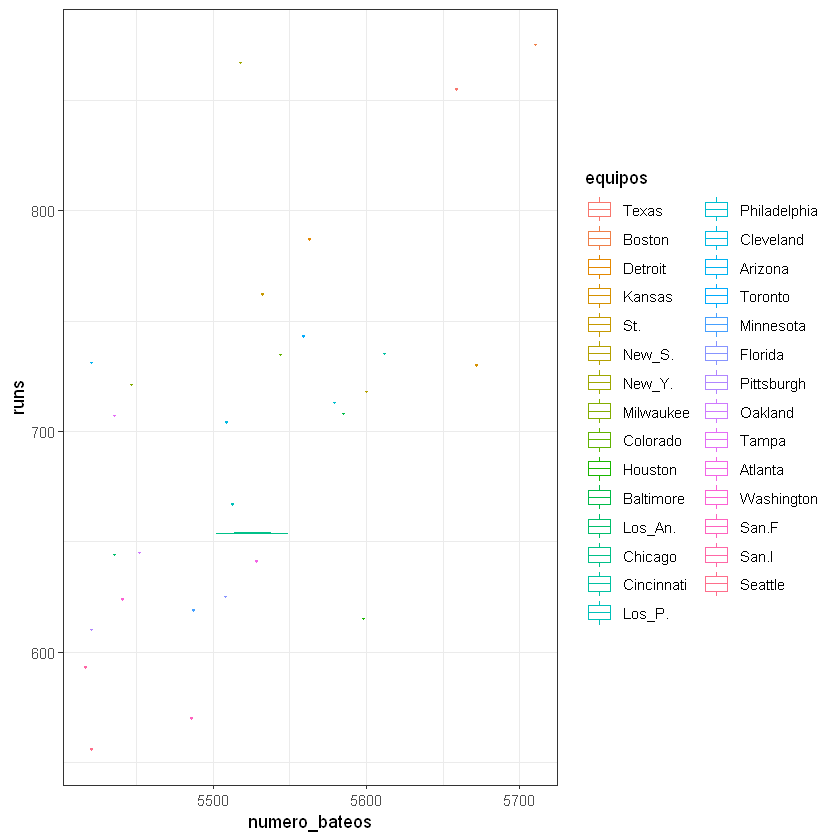

In [36]:
ggplot(data = data, aes(x = numero_bateos, y = runs, color = equipos)) + geom_boxplot() + theme_bw()

In [37]:
cor(data$eq_num,data$runs)

[1] -0.7770829

In [38]:
cor(data$numero_bateos,data$runs)

[1] 0.610627

In [39]:
cor(data$eq_num,data$numero_bateos)

[1] -0.7125417

In [40]:
modelo <- lm(runs ~ (eq_num+numero_bateos)^2, data)
summary(modelo)

data$predicted <- predict(modelo)
data$residuals <- residuals(modelo)


Call:
lm(formula = runs ~ (eq_num + numero_bateos)^2, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-117.646  -34.563   -2.026   30.559  123.070 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)
(Intercept)          -519.06377 1351.35390  -0.384    0.704
eq_num                 56.03587   86.85980   0.645    0.524
numero_bateos           0.23784    0.24201   0.983    0.335
eq_num:numero_bateos   -0.01143    0.01579  -0.724    0.476

Residual standard error: 53.83 on 26 degrees of freedom
Multiple R-squared:  0.6181,	Adjusted R-squared:  0.5741 
F-statistic: 14.03 on 3 and 26 DF,  p-value: 1.234e-05


`geom_smooth()` using formula 'y ~ x'



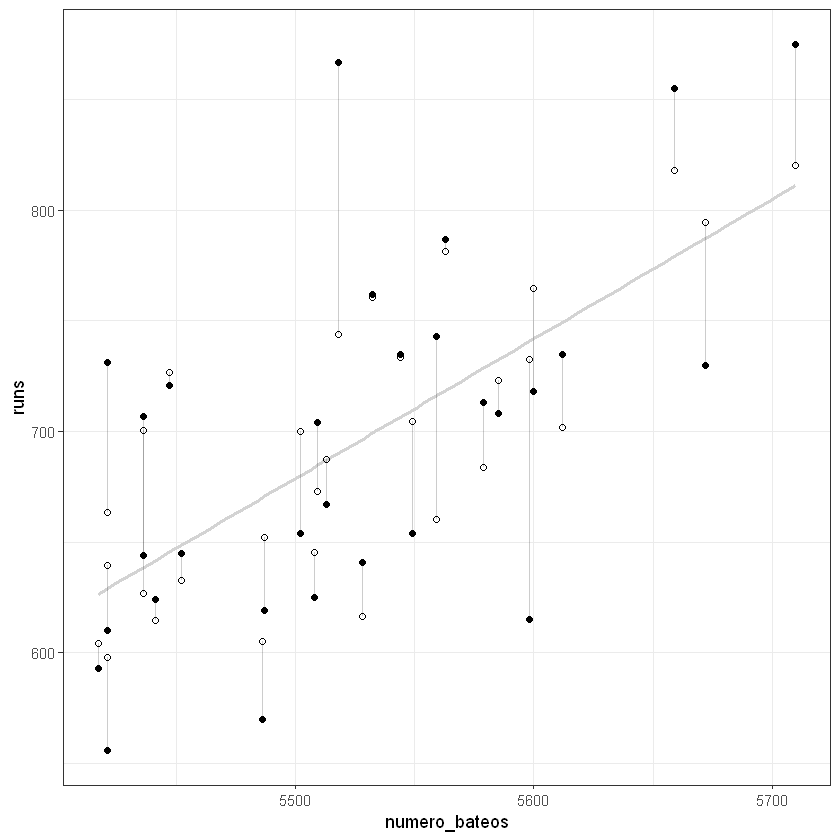

In [41]:
ggplot(data, aes(x = numero_bateos, y = runs)) +
  geom_smooth(method = "lm", se = FALSE, color = "lightgrey") +  # graficar la linea de ajuste
  geom_segment(aes(xend = numero_bateos, yend = predicted), alpha = .2) +  # agregar alfa a los puntos de la linea
  geom_point() +
  geom_point(aes(y = predicted), shape = 1) +
  theme_bw()

`geom_smooth()` using formula 'y ~ x'



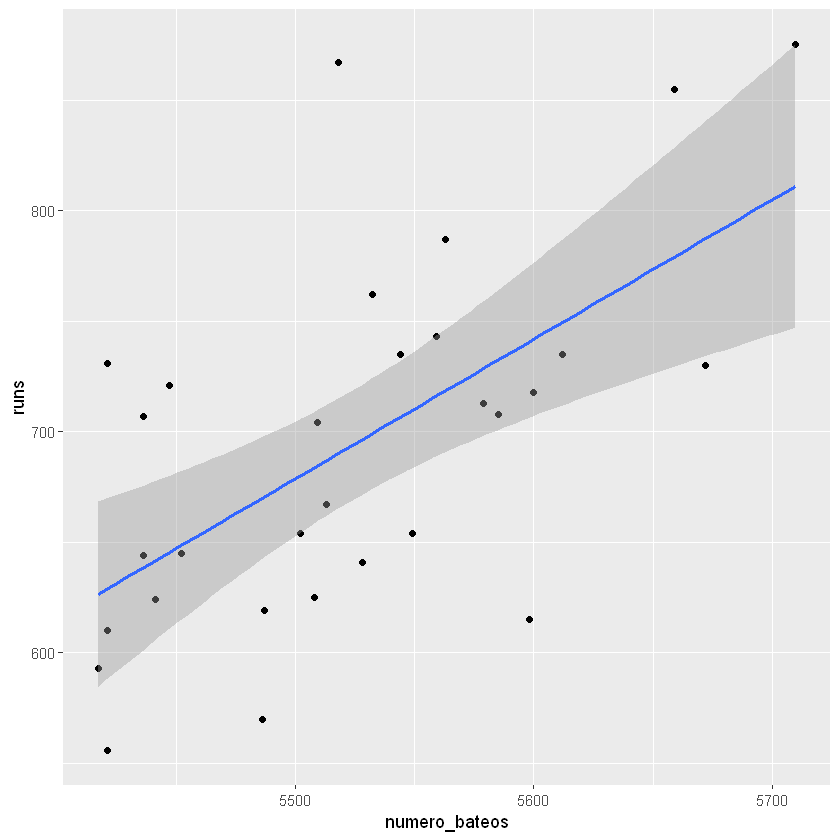

In [42]:
ggplot(data, aes(x= numero_bateos, y = runs)) + geom_point() +
  geom_smooth(method = lm) 

In [43]:
confint(modelo)

2.5 %         97.5 %      
(Intercept)          -3.296811e+03 2.258684e+03
eq_num               -1.225070e+02 2.345787e+02
numero_bateos        -2.596224e-01 7.352932e-01
eq_num:numero_bateos -4.389328e-02 2.102613e-02

In [44]:
predict(modelo,data,interval="confidence")

fit      lwr      upr     
1  818.1800 761.8101 874.5499
2  820.4767 751.0774 889.8760
3  781.3072 742.4175 820.1970
4  794.6771 745.1228 844.2315
5  760.5683 721.8058 799.3308
6  764.8615 734.3636 795.3594
7  743.9297 707.2041 780.6553
8  726.4831 671.8184 781.1477
9  733.3288 705.7368 760.9207
10 732.6459 702.8994 762.3923
11 723.2197 694.2915 752.1479
12 700.4048 654.8496 745.9600
13 704.3672 677.9972 730.7373
14 701.8574 657.9254 745.7894
15 687.1612 662.6272 711.6951
16 683.7870 643.5655 724.0085
17 700.1749 673.2233 727.1264
18 672.9924 648.2008 697.7841
19 663.2220 625.4580 700.9860
20 660.1189 617.3076 702.9302
21 651.9357 627.0484 676.8230
22 645.1879 614.7827 675.5931
23 639.4398 601.4852 677.3943
24 632.7150 602.6765 662.7535
25 627.0001 591.3397 662.6606
26 616.4667 567.9258 665.0076
27 614.4688 575.9167 653.0210
28 605.1054 565.5089 644.7019
29 604.0957 551.5602 656.6312
30 597.8209 543.9150 651.7269

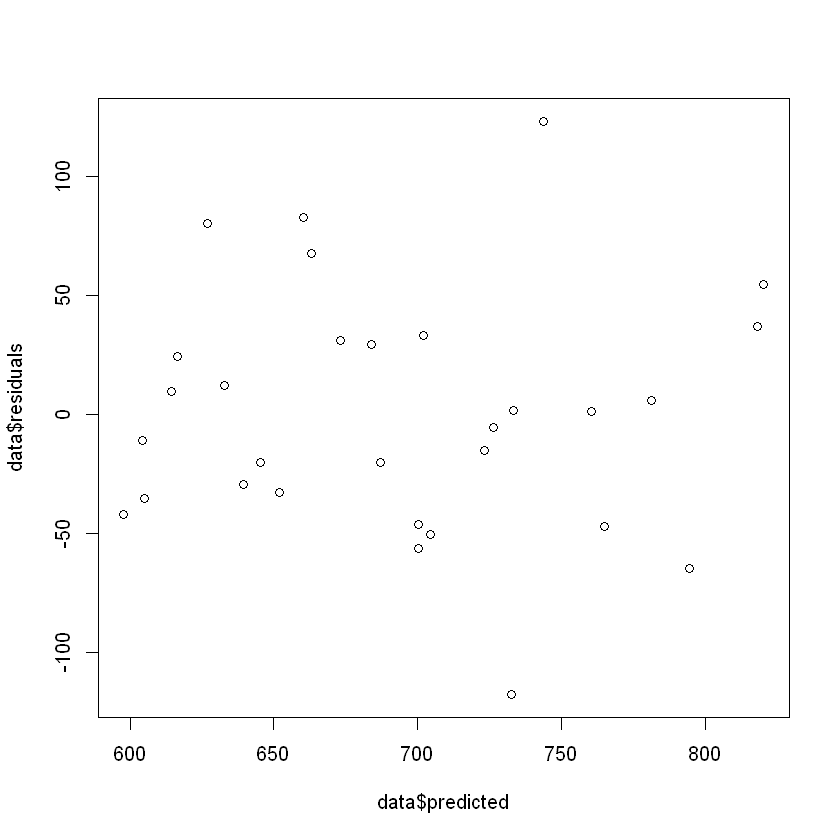

In [45]:
#gráfico de dispersión de los residuos

plot(data$predicted, data$residuals)

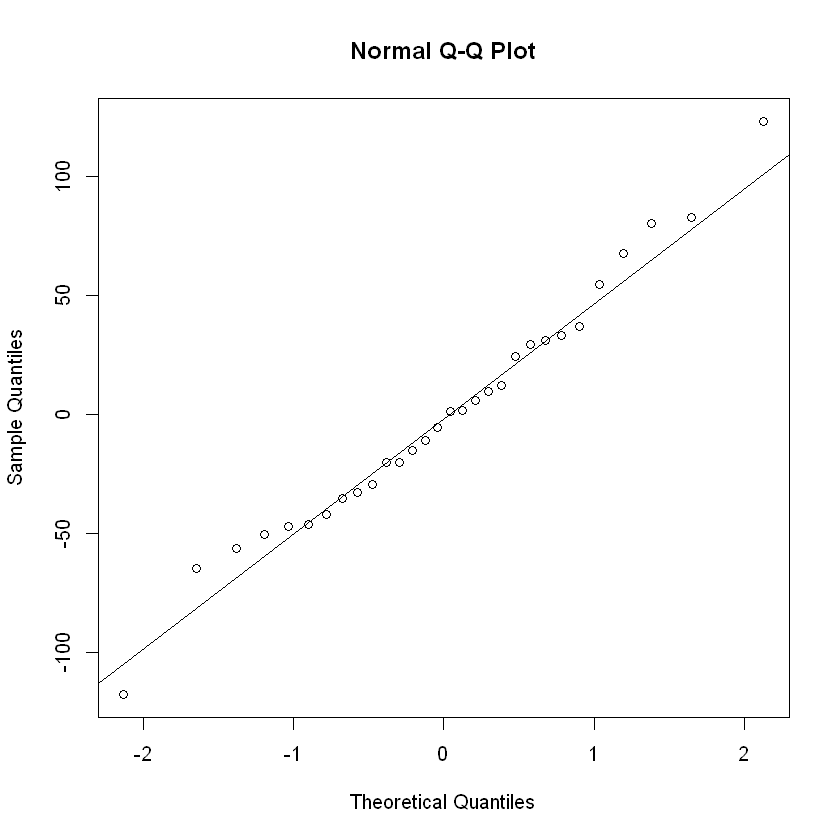

In [46]:
qqnorm(data$residuals)
qqline(data$residuals)

In [47]:
shapiro.test(data$residuals)


	Shapiro-Wilk normality test

data:  data$residuals
W = 0.98355, p-value = 0.91


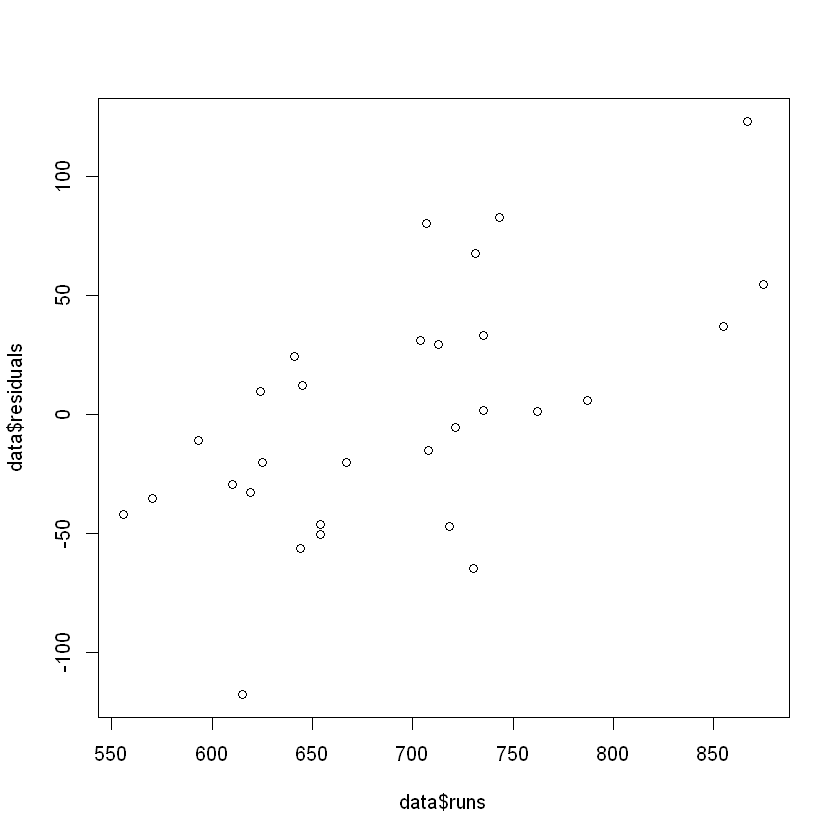

In [48]:
#Homoscedasticidad
plot(data$runs, data$residuals)

In [49]:
bptest(modelo,stud=F)


	Breusch-Pagan test

data:  modelo
BP = 1.2119, df = 3, p-value = 0.7501


In [50]:
outlierTest(model = modelo)

No Studentized residuals with Bonferroni p < 0.05
Largest |rstudent|:
  rstudent unadjusted p-value Bonferroni p
7 2.701407           0.012218      0.36655

## Práctica Guiada

Elabore un reporte que incluya el procedimiento y los resultados de cada una de los siguientes ítemes.

In [51]:
data <- fivethirtyeight::drug_use
head(data)

age n    alcohol_use alcohol_freq marijuana_use marijuana_freq cocaine_use
1 12  2798  3.9         3            1.1           4             0.1        
2 13  2757  8.5         6            3.4          15             0.1        
3 14  2792 18.1         5            8.7          24             0.1        
4 15  2956 29.2         6           14.5          25             0.5        
5 16  3058 40.1        10           22.5          30             1.0        
6 17  3038 49.3        13           28.0          36             2.0        
  cocaine_freq crack_use crack_freq ⋯ oxycontin_use oxycontin_freq
1 5.0          0.0         NA       ⋯ 0.1           24.5          
2 1.0          0.0        3.0       ⋯ 0.1           41.0          
3 5.5          0.0         NA       ⋯ 0.4            4.5          
4 4.0          0.1        9.5       ⋯ 0.8            3.0          
5 7.0          0.0        1.0       ⋯ 1.1            4.0          
6 5.0          0.1       21.0       ⋯ 1.4            6.0          
  tranquilizer_use tranquilizer_freq stimulant_use stimulant_freq meth_use
1 0.2              52.0              0.2            2.0           0.0     
2 0.3              25.5              0.3            4.0           0.1     
3 0.9               5.0              0.8           12.0           0.1     
4 2.0               4.5              1.5            6.0           0.3     
5 2.4              11.0              1.8            9.5           0.3     
6 3.5               7.0              2.8            9.0           0.6     
  meth_freq sedative_use sedative_freq
1   NA      0.2          13.0         
2  5.0      0.1          19.0         
3 24.0      0.2          16.5         
4 10.5      0.4          30.0         
5 36.0      0.2           3.0         
6 48.0      0.5           6.5

1. Cree un subconjunto que contenga solamente las columnas con la información de:
- age
- n
- alcohol_use
- alcohol_freq
- marijuana_use
- marijuana_freq
Creamos el dataset solicitado.

In [52]:
data <- data %>% select(age, n, alcohol_use, alcohol_freq, marijuana_use,marijuana_freq)

In [53]:
summary(data)

      age           n         alcohol_use     alcohol_freq   marijuana_use  
 12     : 1   Min.   :2223   Min.   : 3.90   Min.   : 3.00   Min.   : 1.10  
 13     : 1   1st Qu.:2469   1st Qu.:40.10   1st Qu.:10.00   1st Qu.: 8.70  
 14     : 1   Median :2798   Median :64.60   Median :48.00   Median :20.80  
 15     : 1   Mean   :3251   Mean   :55.43   Mean   :33.35   Mean   :18.92  
 16     : 1   3rd Qu.:3058   3rd Qu.:77.50   3rd Qu.:52.00   3rd Qu.:28.40  
 17     : 1   Max.   :7391   Max.   :84.20   Max.   :52.00   Max.   :34.00  
 (Other):11                                                                 
 marijuana_freq 
 Min.   : 4.00  
 1st Qu.:30.00  
 Median :52.00  
 Mean   :42.94  
 3rd Qu.:52.00  
 Max.   :72.00  
                

In [54]:
data$age <- as.numeric(data$age)

2. Elabore al menos dos gráficos de manera exploratoria del subconjunto de datos creado.
Podemos explorar las variables con ayuda de histogramas.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



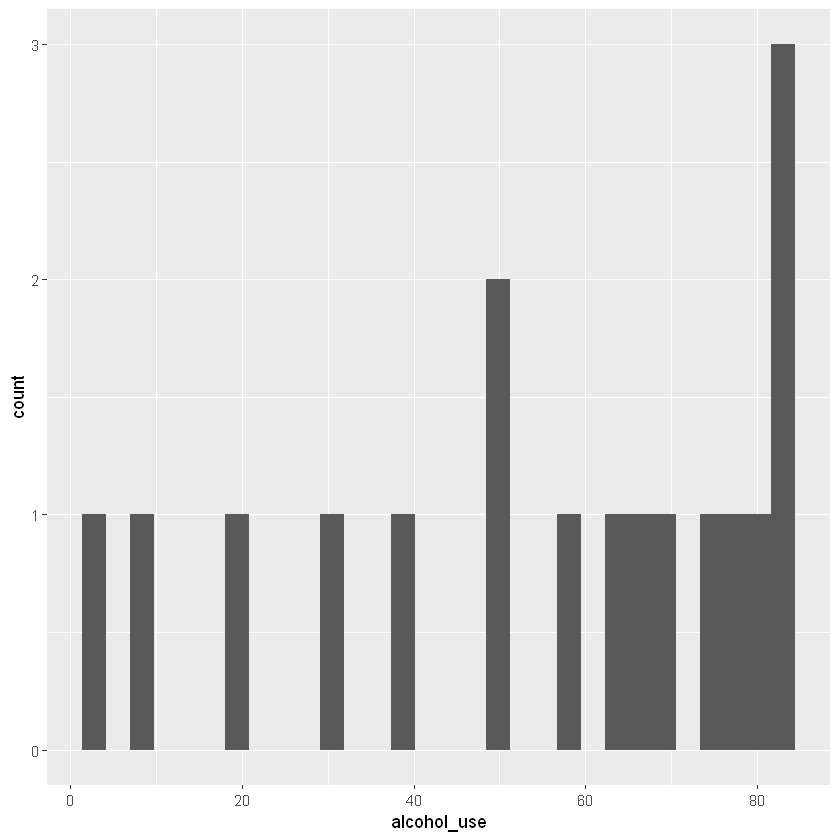

In [55]:
ggplot(data) + geom_histogram(mapping = aes(x = alcohol_use))

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



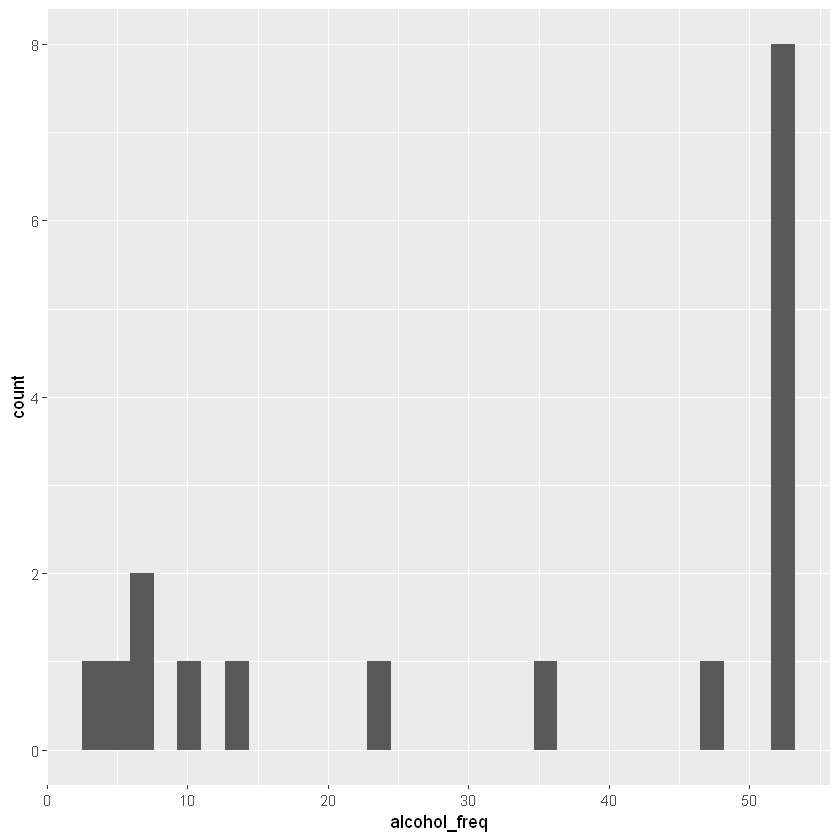

In [56]:
ggplot(data) + geom_histogram(mapping = aes(x = alcohol_freq))

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



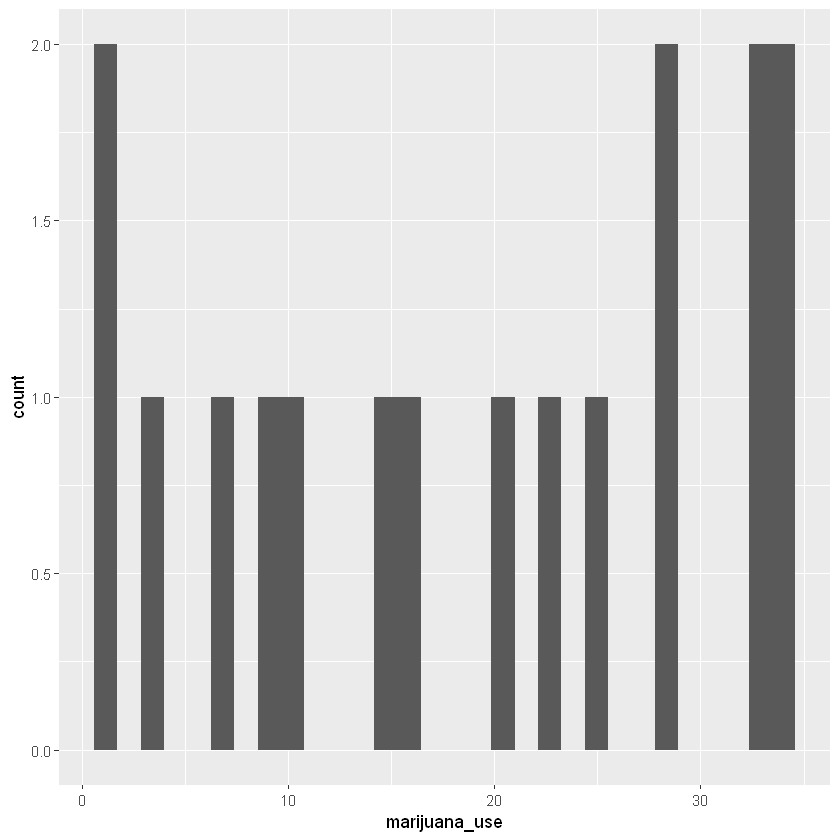

In [57]:
ggplot(data) + geom_histogram(mapping = aes(x = marijuana_use))

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



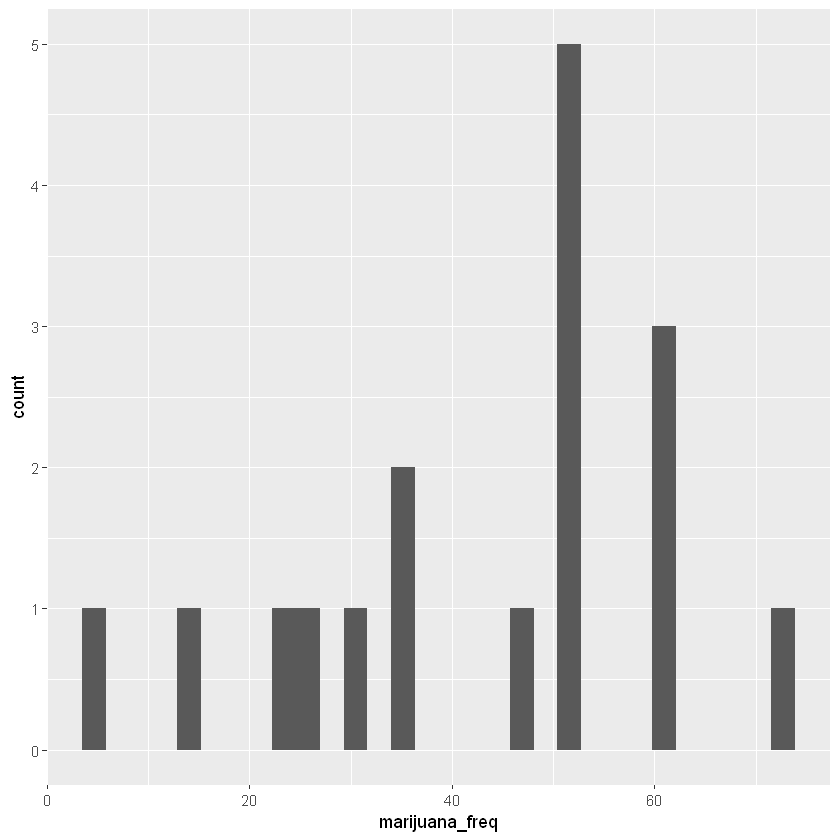

In [58]:
ggplot(data) + geom_histogram(mapping = aes(x = marijuana_freq))

Recordemos que cada observación representa la cantidad de n, por lo que en realidad son muchas más observaciones agregadas.

3. Realice un análisis de normalidad sobre la variable alcohol_use y marijuana_use (visual (qq, skew, kurtosis) y con pruebas estadísticas (anderson-darling o shapiro)).

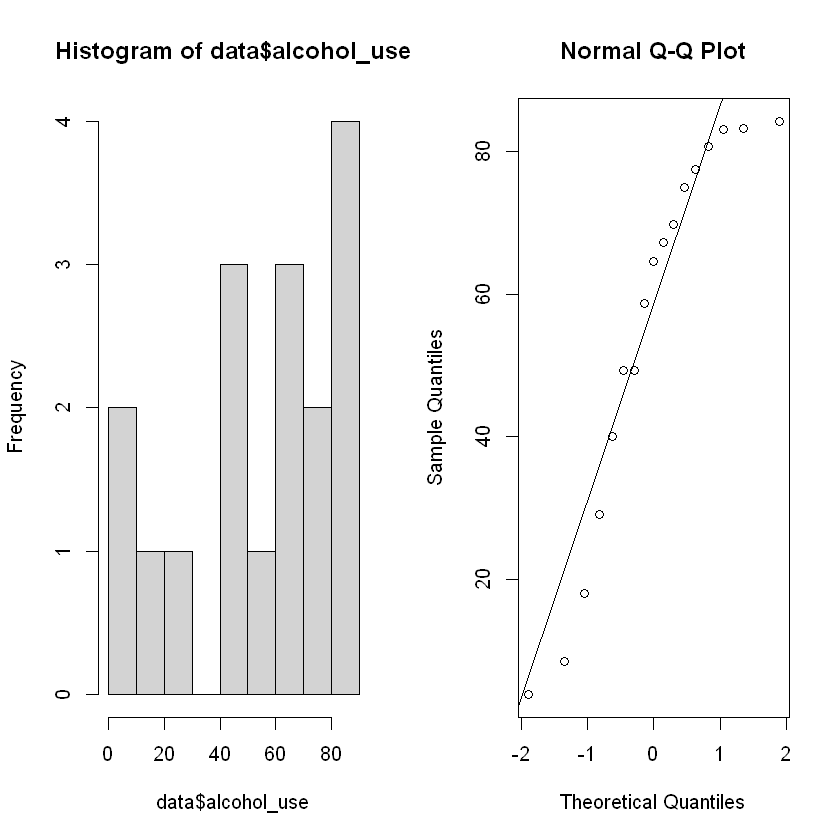

In [59]:
par(mfrow = c(1, 2))
hist(data$alcohol_use)
qqnorm(data$alcohol_use)
qqline(data$alcohol_use)

In [60]:
par(mfrow = c(1, 1))

In [61]:
curtosis <- kurtosis(data$alcohol_use, na.rm = TRUE) 
simetria <- skewness(data$alcohol_use,na.rm = TRUE) 
print(paste(curtosis, " --- ", simetria))

[1] "2.17549951976414  ---  -0.690577359379459"


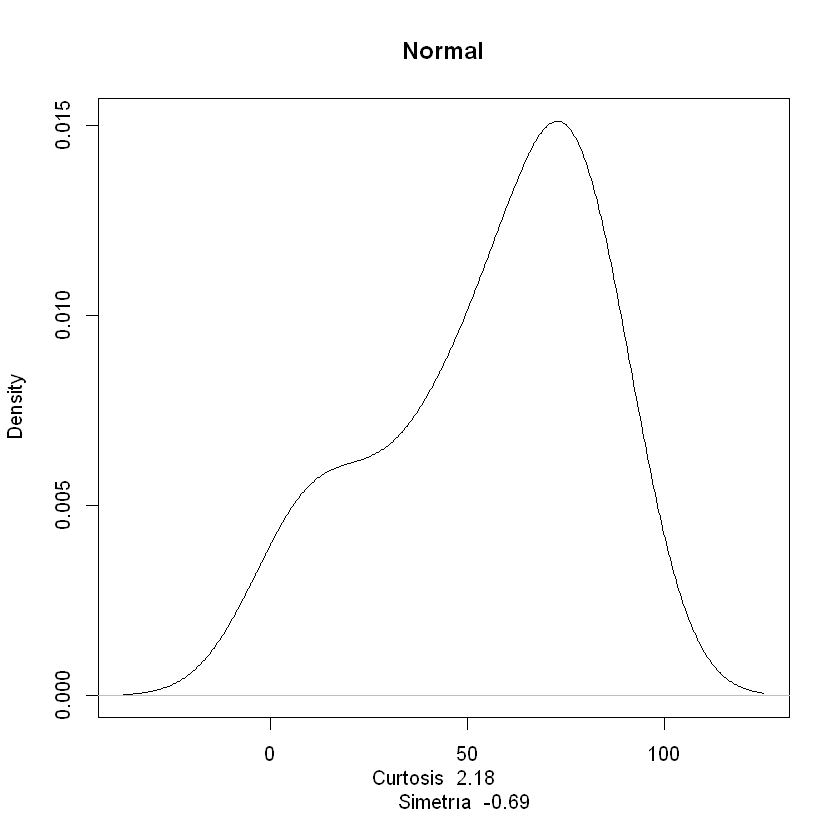

In [62]:
plot (density(data$alcohol_use,na.rm = TRUE), 
      main = "Normal", 
     xlab = paste("Curtosis ", round(curtosis, 2), "  
      ", "Simetrıa ", round(simetria, 2)))

In [63]:
alcohol_useComplete <- data$alcohol_use[complete.cases(data$alcohol_use)] 
shapiro.test(alcohol_useComplete)


	Shapiro-Wilk normality test

data:  alcohol_useComplete
W = 0.88974, p-value = 0.04588


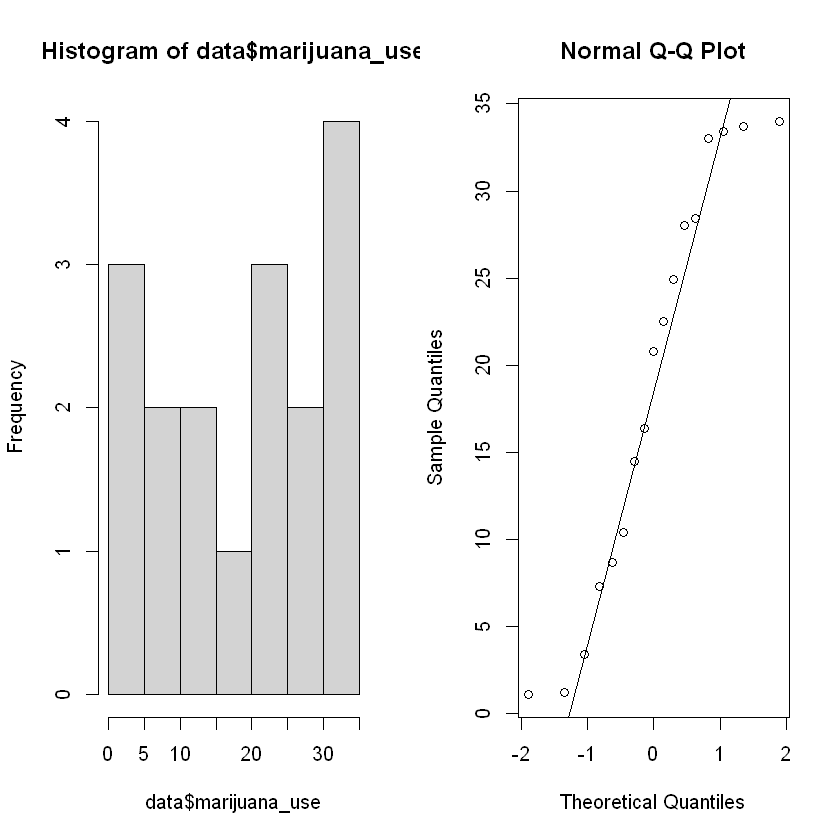

In [64]:
par(mfrow = c(1, 2))
hist(data$marijuana_use)
qqnorm(data$marijuana_use)
qqline(data$marijuana_use)

In [65]:
par(mfrow = c(1, 1))

In [66]:
curtosis <- kurtosis(data$marijuana_use, na.rm = TRUE) 
simetria <- skewness(data$marijuana_use,na.rm = TRUE) 
print(paste(curtosis, " --- ", simetria))

[1] "1.5948768927838  ---  -0.150277448417065"


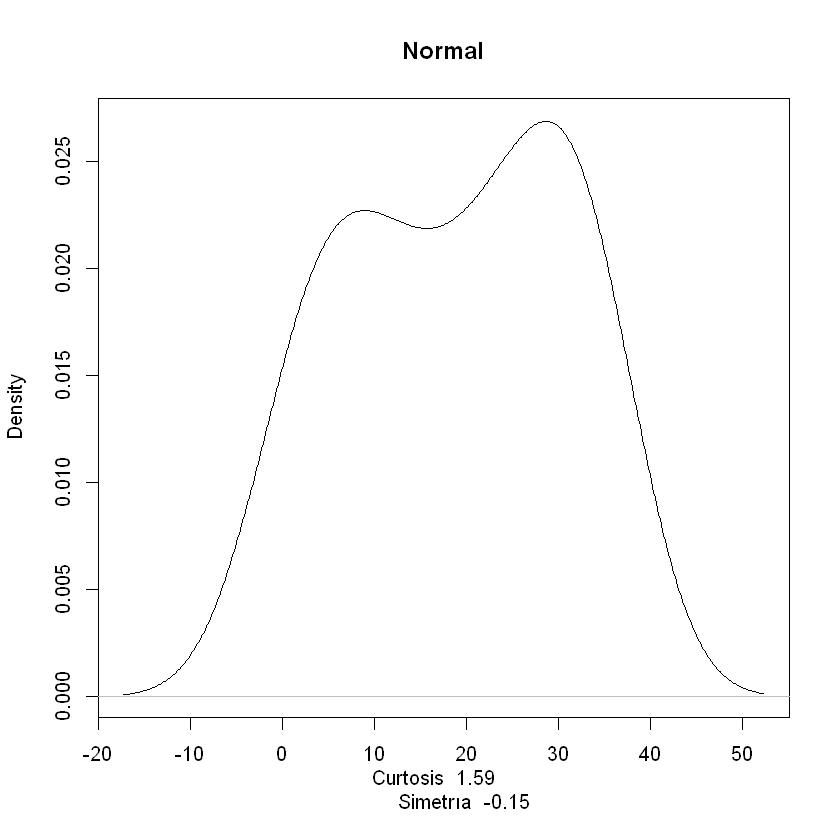

In [67]:
plot (density(data$marijuana_use,na.rm = TRUE), 
      main = "Normal", 
     xlab = paste("Curtosis ", round(curtosis, 2), "  
      ", "Simetrıa ", round(simetria, 2)))

In [68]:
marijuana_useComplete <- data$marijuana_use[complete.cases(data$marijuana_use)] 
shapiro.test(marijuana_useComplete)


	Shapiro-Wilk normality test

data:  marijuana_useComplete
W = 0.90996, p-value = 0.0999


4. En caso de que los datos no sigan una distribución normal, explore como podría cambiar eso y repita el paso anterior.

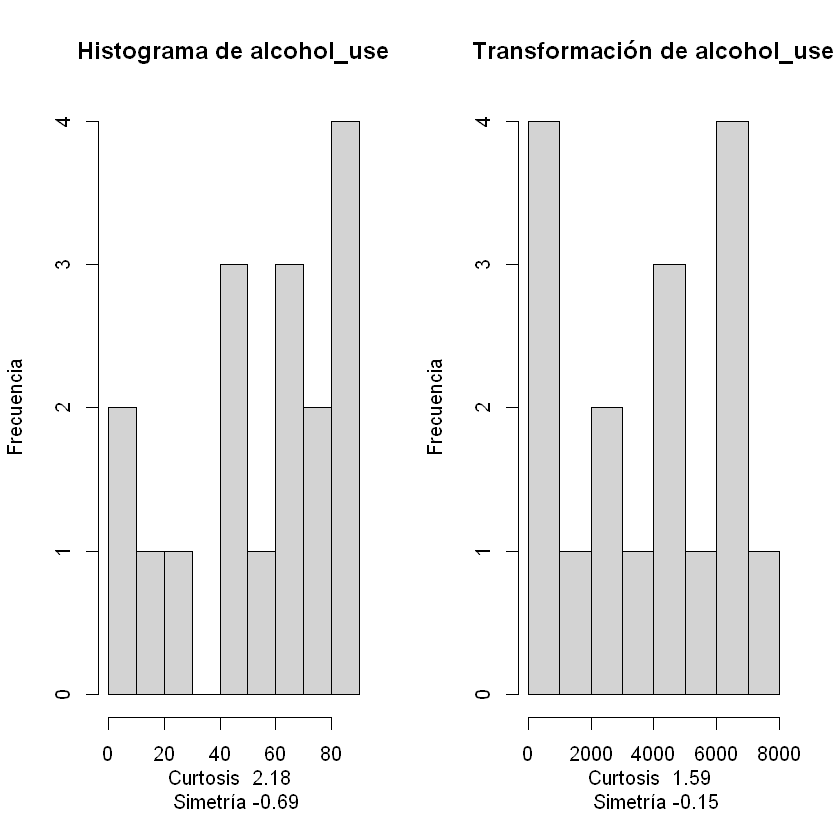

In [69]:
par(mfrow = c(1, 2))  
data_alcohol_trans <- (data$alcohol_use)^(2)                  

#Graficar los resultados
hist(data$alcohol_use, main = "Histograma de alcohol_use",
     xlab = paste("Curtosis ", round(kurtosis(data$alcohol_use), 2), "\n", "Simetría", round(skewness(data$alcohol_use), 2)), 
     ylab="Frecuencia")

hist(data_alcohol_trans, main = "Transformación de alcohol_use",
     xlab = paste("Curtosis ", round(kurtosis(data_alcohol_trans), 2), "\n", "Simetría", round(skewness(data_alcohol_trans), 2)), 
     ylab="Frecuencia")


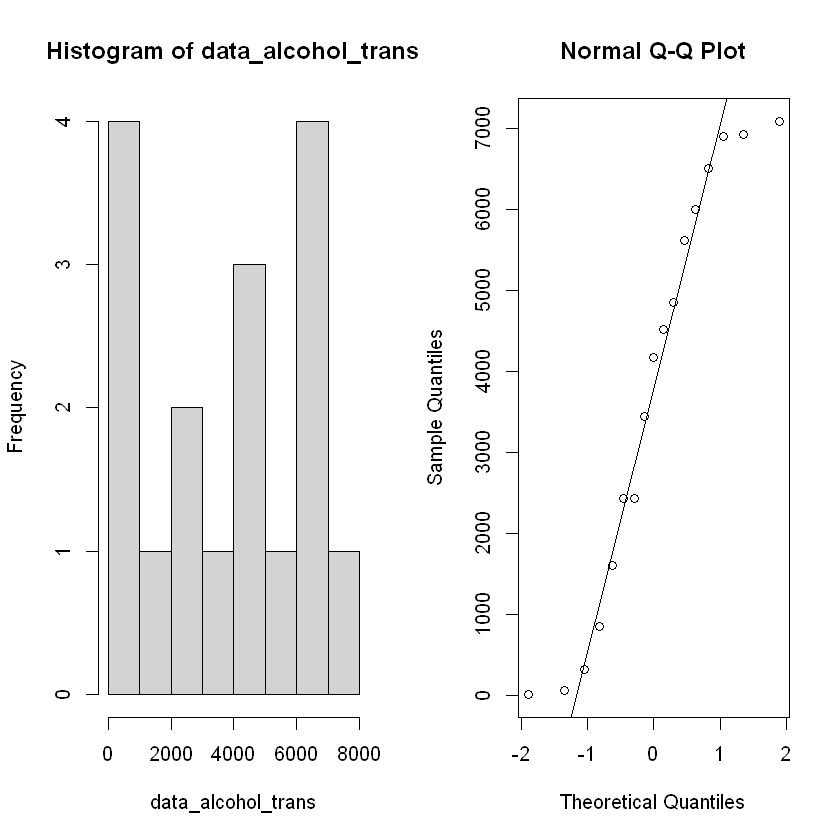

In [70]:
par(mfrow = c(1, 2))
hist(data_alcohol_trans)
qqnorm(data_alcohol_trans)
qqline(data_alcohol_trans)

In [71]:
par(mfrow = c(1, 1))

In [72]:
curtosis <- kurtosis(data_alcohol_trans, na.rm = TRUE) 
simetria <- skewness(data_alcohol_trans,na.rm = TRUE) 
print(paste(curtosis, " --- ", simetria))

[1] "1.59273222011261  ---  -0.152253997641338"


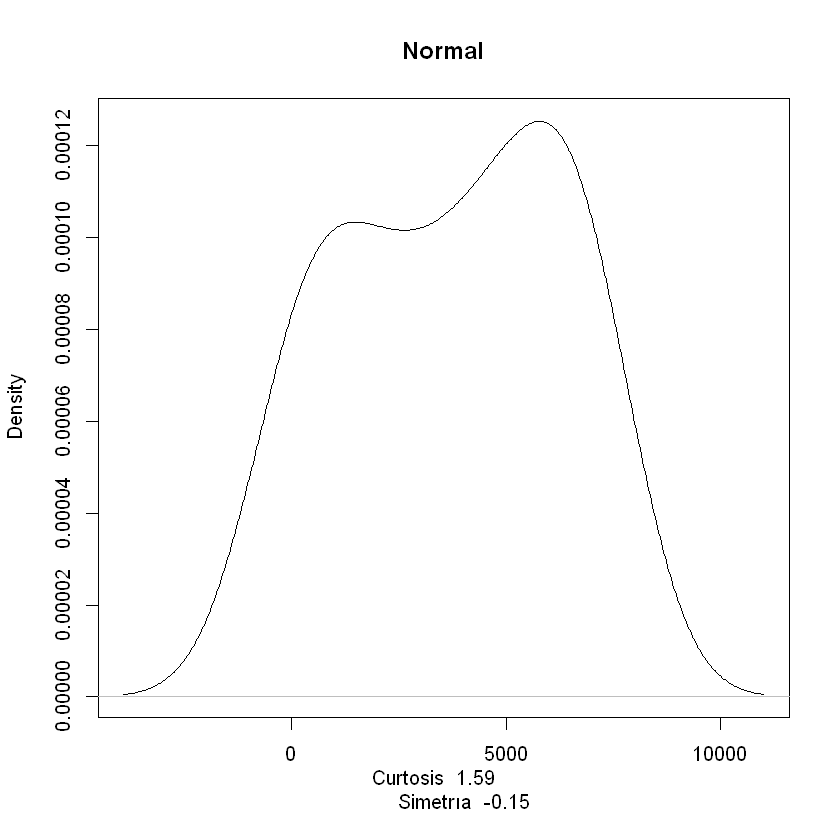

In [73]:
plot (density(data_alcohol_trans,na.rm = TRUE), 
      main = "Normal", 
     xlab = paste("Curtosis ", round(curtosis, 2), "  
      ", "Simetrıa ", round(simetria, 2)))

In [74]:
insurance_premiumsComplete <- data_alcohol_trans[complete.cases(data_alcohol_trans)] 
shapiro.test(data_alcohol_trans)


	Shapiro-Wilk normality test

data:  data_alcohol_trans
W = 0.91159, p-value = 0.1064


5. Haga un análisis de varianza, dónde explique la edad según el uso de alcohol y marihuana. Y otro en el que se explique el uso del alcohol según el uso de marihuana.

In [75]:
g <- lm(age~alcohol_use+marijuana_use, data = data)
summary(g)


Call:
lm(formula = age ~ alcohol_use + marijuana_use, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.6738 -1.0784 -0.6334  1.0372  4.2611 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    2.12330    0.95789   2.217   0.0437 *  
alcohol_use    0.22233    0.01908  11.651 1.36e-08 ***
marijuana_use -0.28785    0.04289  -6.712 9.91e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.65 on 14 degrees of freedom
Multiple R-squared:  0.9066,	Adjusted R-squared:  0.8932 
F-statistic: 67.91 on 2 and 14 DF,  p-value: 6.222e-08


In [76]:
g <- lm(alcohol_use~marijuana_use, data = drug_use)
summary(g)


Call:
lm(formula = alcohol_use ~ marijuana_use, data = drug_use)

Residuals:
    Min      1Q  Median      3Q     Max 
-27.729 -20.105  -5.862  19.690  30.953 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
(Intercept)    30.1598    10.3606   2.911   0.0108 *
marijuana_use   1.3354     0.4668   2.861   0.0119 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 22.33 on 15 degrees of freedom
Multiple R-squared:  0.353,	Adjusted R-squared:  0.3099 
F-statistic: 8.185 on 1 and 15 DF,  p-value: 0.0119


6. Responda a las siguientes preguntas:

- ¿Cuál es la edad asociada al mayor uso de alcohol?

In [77]:
data %>% select(age,alcohol_use) %>% arrange(desc(alcohol_use)) %>% top_n(1)

Selecting by alcohol_use


age alcohol_use
1 11  84.2

- ¿Cuál es la edad asociada al mayor uso de marihuana?

In [78]:
data %>% select(age,marijuana_use) %>% arrange(desc(marijuana_use)) %>% top_n(1)

Selecting by marijuana_use


age marijuana_use
1 9   34

- ¿Cuál es la mayor frecuencia de alcohol, con qué uso asociado?¿Y de marihuana?

In [79]:
unique(data %>% select(alcohol_freq,alcohol_use) %>% arrange(desc(alcohol_freq)))  %>% top_n(1)

Selecting by alcohol_use


alcohol_freq alcohol_use
1 52           84.2

In [80]:
unique(data %>% select(marijuana_freq,marijuana_use) %>% arrange(desc(marijuana_freq))) %>% top_n(1)

Selecting by marijuana_use


marijuana_freq marijuana_use
1 60             34

# 8 Referencias
- Regression and Other Stories. Andrew Gelman, Jennifer Hill, Aki Vehtari. 2020.
- Learning Statistics with R: A tutorial for psychology students and other beginners. Danielle Navarro. Version 0.6.
- OpenIntro Statistics. Diez, Barr & Cetinkaya-Rundel. Third Edition, 2017.